## Introduction and Data Loading

Di bagian ini, saya memuat kumpulan data ke Pandas DataFrames. Kumpulan data tersebut meliputi:

- Student count by country
- Exam preparation status distribution
- Average stress level by country
- AI usage summary
- Detailed student life data

Terdapat beberapa file memiliki nilai numerik yang disimpan sebagai string (seperti jumlah)

In [ ]:
# Load datasets

# Student count by country
student_count_df = pd.read_csv('/content/student_count_by_country.csv', delimiter=',', encoding='ascii')

# Exam preparation status distribution
exam_prep_df = pd.read_csv('/content/exam_prep_status_distribution.csv', delimiter=',', encoding='ascii')

# Average stress by country
avg_stress_df = pd.read_csv('/content/avg_stress_by_country.csv', delimiter=',', encoding='ascii')

# AI usage summary
ai_usage_df = pd.read_csv('/content/ai_usage_summary.csv', delimiter=',', encoding='ascii')

# Student life data
student_life_df = pd.read_csv('/content/student life.csv', delimiter=',', encoding='ascii')

# Quick demonstration of data loaded
print('Student Count by Country DataFrame shape:', student_count_df.shape)
print('Exam Preparation DataFrame shape:', exam_prep_df.shape)
print('Average Stress by Country DataFrame shape:', avg_stress_df.shape)
print('AI Usage Summary DataFrame shape:', ai_usage_df.shape)
print('Student Life DataFrame shape:', student_life_df.shape)

Student Count by Country DataFrame shape: (10, 2)
Exam Preparation DataFrame shape: (4, 2)
Average Stress by Country DataFrame shape: (10, 2)
AI Usage Summary DataFrame shape: (2, 2)
Student Life DataFrame shape: (500, 10)


## Data Cleaning and Preprocessing

In [ ]:
# Convert string numeric columns to numbers where applicable

def convert_to_numeric(df, col_list):
    for col in col_list:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

# For student_count_df, assume 'count' is already numeric and 'student_count' is categorical, so we leave it

# For exam_prep_df, convert the 'count.1' column to numeric
exam_prep_df = convert_to_numeric(exam_prep_df, ['count.1'])

# For ai_usage_df, convert 'count.1' to numeric
ai_usage_df = convert_to_numeric(ai_usage_df, ['count.1'])

# For avg_stress_df, 'avg_stress_level' is already numeric

# For student_life_df, columns like age, grade, avg_sleep_hours, daily_screen_time, and stress_level should be numeric.
student_life_df['grade'] = pd.to_numeric(student_life_df['grade'], errors='coerce')
student_life_df['avg_sleep_hours'] = pd.to_numeric(student_life_df['avg_sleep_hours'], errors='coerce')
student_life_df['daily_screen_time'] = pd.to_numeric(student_life_df['daily_screen_time'], errors='coerce')
student_life_df['stress_level'] = pd.to_numeric(student_life_df['stress_level'], errors='coerce')

# Display summary of cleaning
print('Exam Preparation Data Types:')
print(exam_prep_df.dtypes)

print('\nStudent Life Data Types:')
print(student_life_df.dtypes)

Exam Preparation Data Types:
count      object
count.1     int64
dtype: object

Student Life Data Types:
id                     int64
age                    int64
gender                object
grade                  int64
avg_sleep_hours      float64
daily_screen_time    float64
uses_AI_for_study     object
board_exam_prep       object
stress_level           int64
country               object
dtype: object


## Exploratory Data Analysis

Di bagian ini, saya melakukan analisis Exploratory Data pada setiap set data. Saya menggunakan berbagai teknik pembuatan grafik termasuk bar plots, histogram, boxen plots, dan heatmaps. Beberapa teknik umum yang digunakan tercantum dalam tabel metode visualisasi.

### Student Count by Country


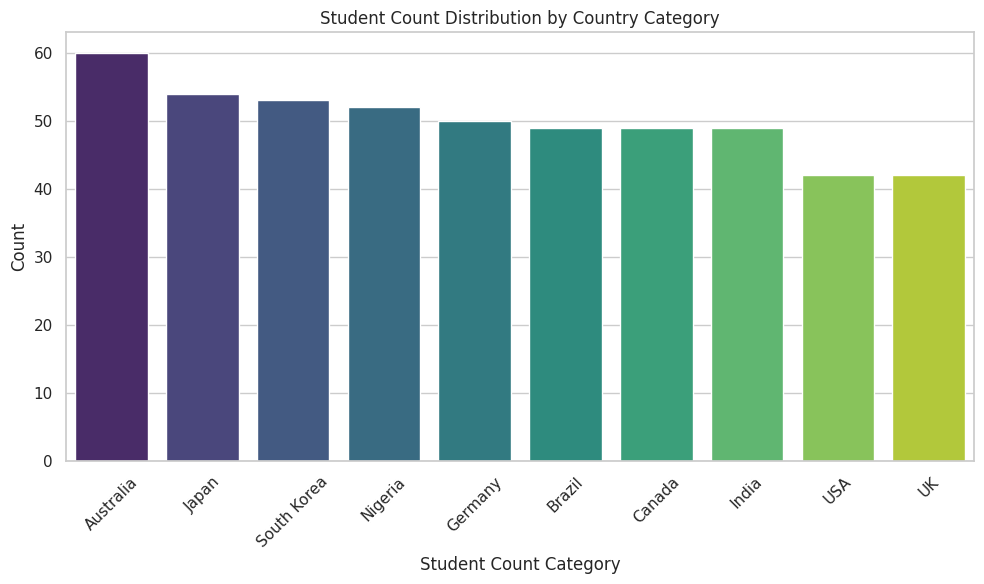

  student_count  count
0     Australia     60
1         Japan     54
2   South Korea     53
3       Nigeria     52
4       Germany     50


In [ ]:
# Exploratory analysis for student_count_by_country
plt.figure(figsize=(10,6))
sns.barplot(data=student_count_df, x='student_count', y='count', palette='viridis')
plt.title('Student Count Distribution by Country Category')
plt.xlabel('Student Count Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# A brief look at the data
print(student_count_df.head())

### Exam Preparation Status Distribution


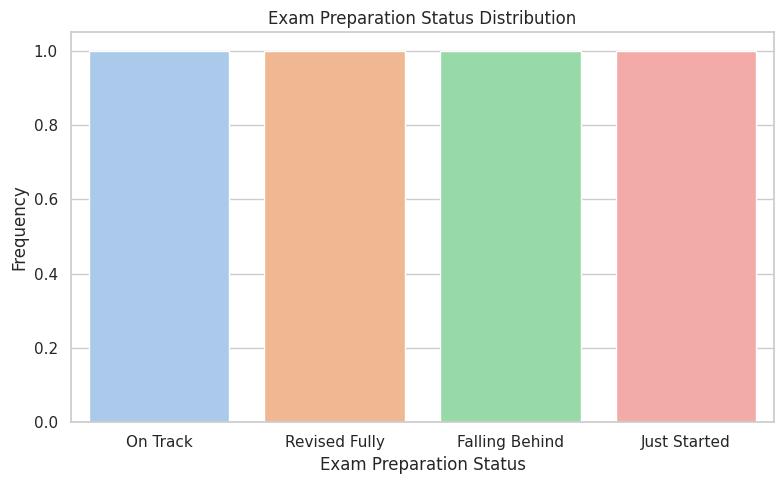

            count  count.1
0        On Track      174
1   Revised Fully      118
2  Falling Behind      117
3    Just Started       91


In [ ]:
# Plot exam preparation status distribution
plt.figure(figsize=(8,5))
sns.countplot(data=exam_prep_df, x='count', palette='pastel')
plt.title('Exam Preparation Status Distribution')
plt.xlabel('Exam Preparation Status')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print(exam_prep_df.head())

### Average Stress by Country

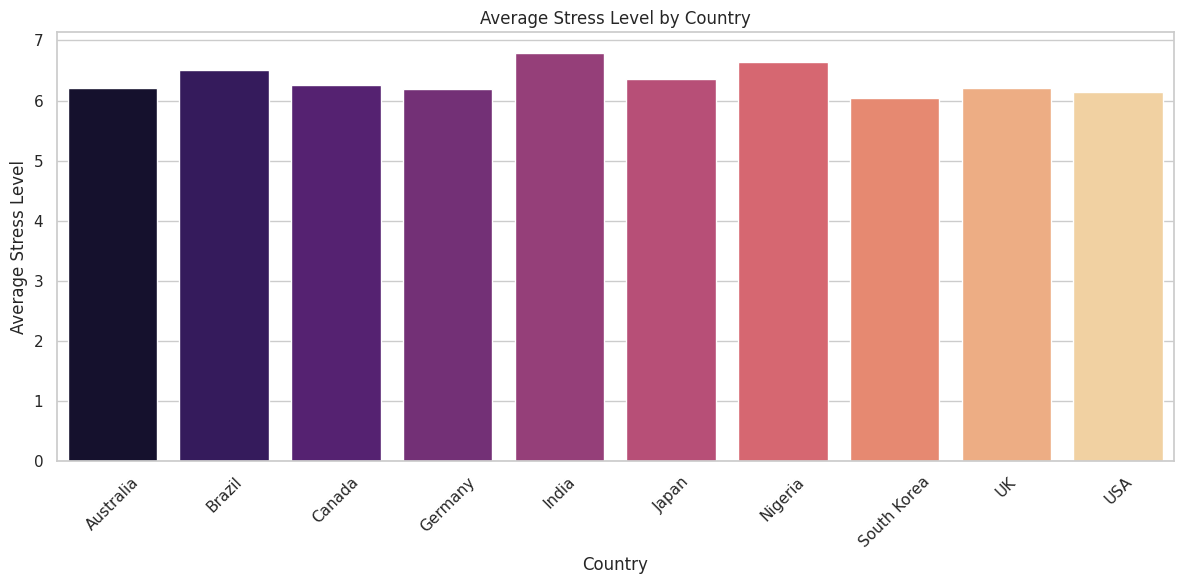

     country  avg_stress_level
0  Australia          6.216667
1     Brazil          6.510204
2     Canada          6.265306
3    Germany          6.200000
4      India          6.795918


In [ ]:
# Plot average stress by country
plt.figure(figsize=(12,6))
sns.barplot(data=avg_stress_df, x='country', y='avg_stress_level', palette='magma')
plt.title('Average Stress Level by Country')
plt.xlabel('Country')
plt.ylabel('Average Stress Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(avg_stress_df.head())

### AI Usage Summary

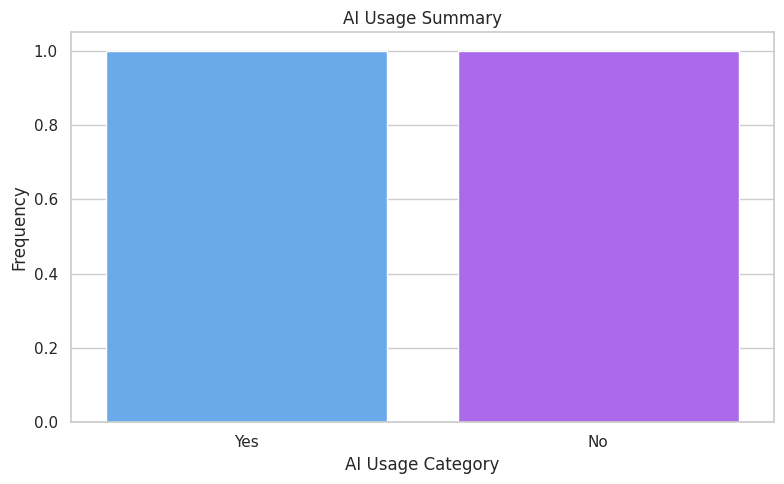

  count  count.1
0   Yes      333
1    No      167


In [ ]:
# Plot AI usage summary
plt.figure(figsize=(8,5))
sns.countplot(data=ai_usage_df, x='count', palette='cool')
plt.title('AI Usage Summary')
plt.xlabel('AI Usage Category')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print(ai_usage_df.head())

### Student Life Data


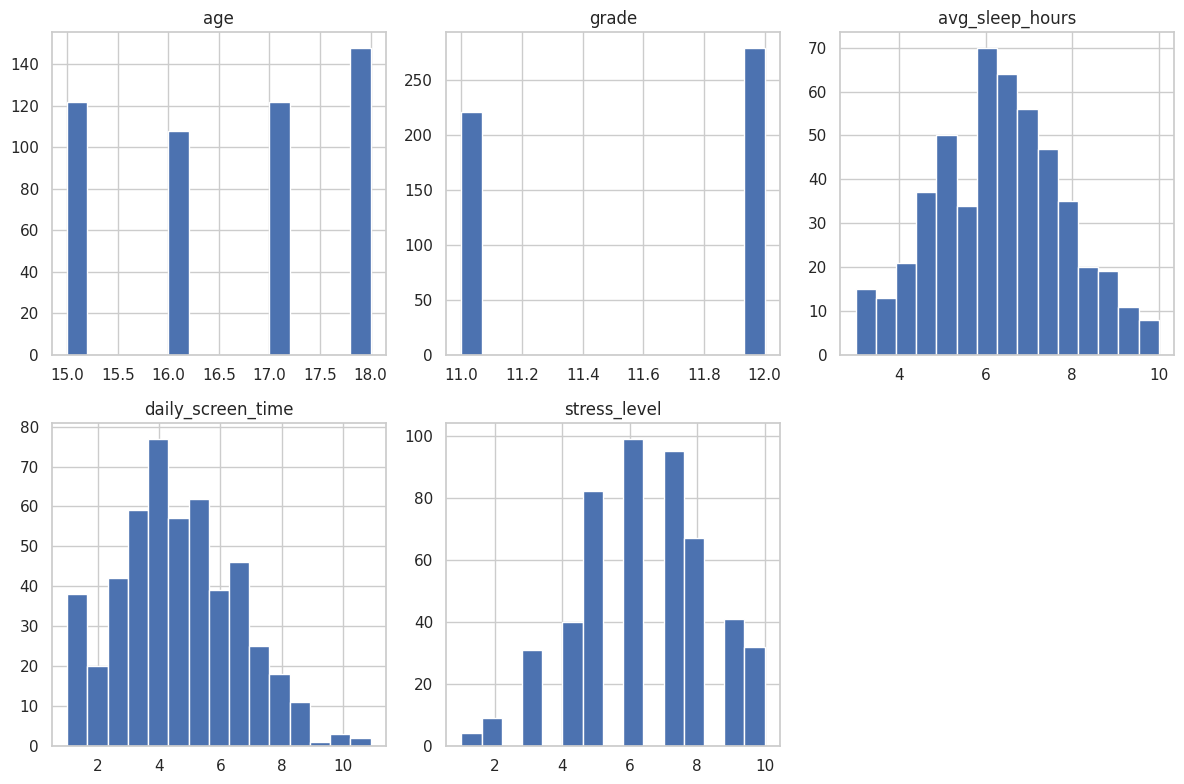

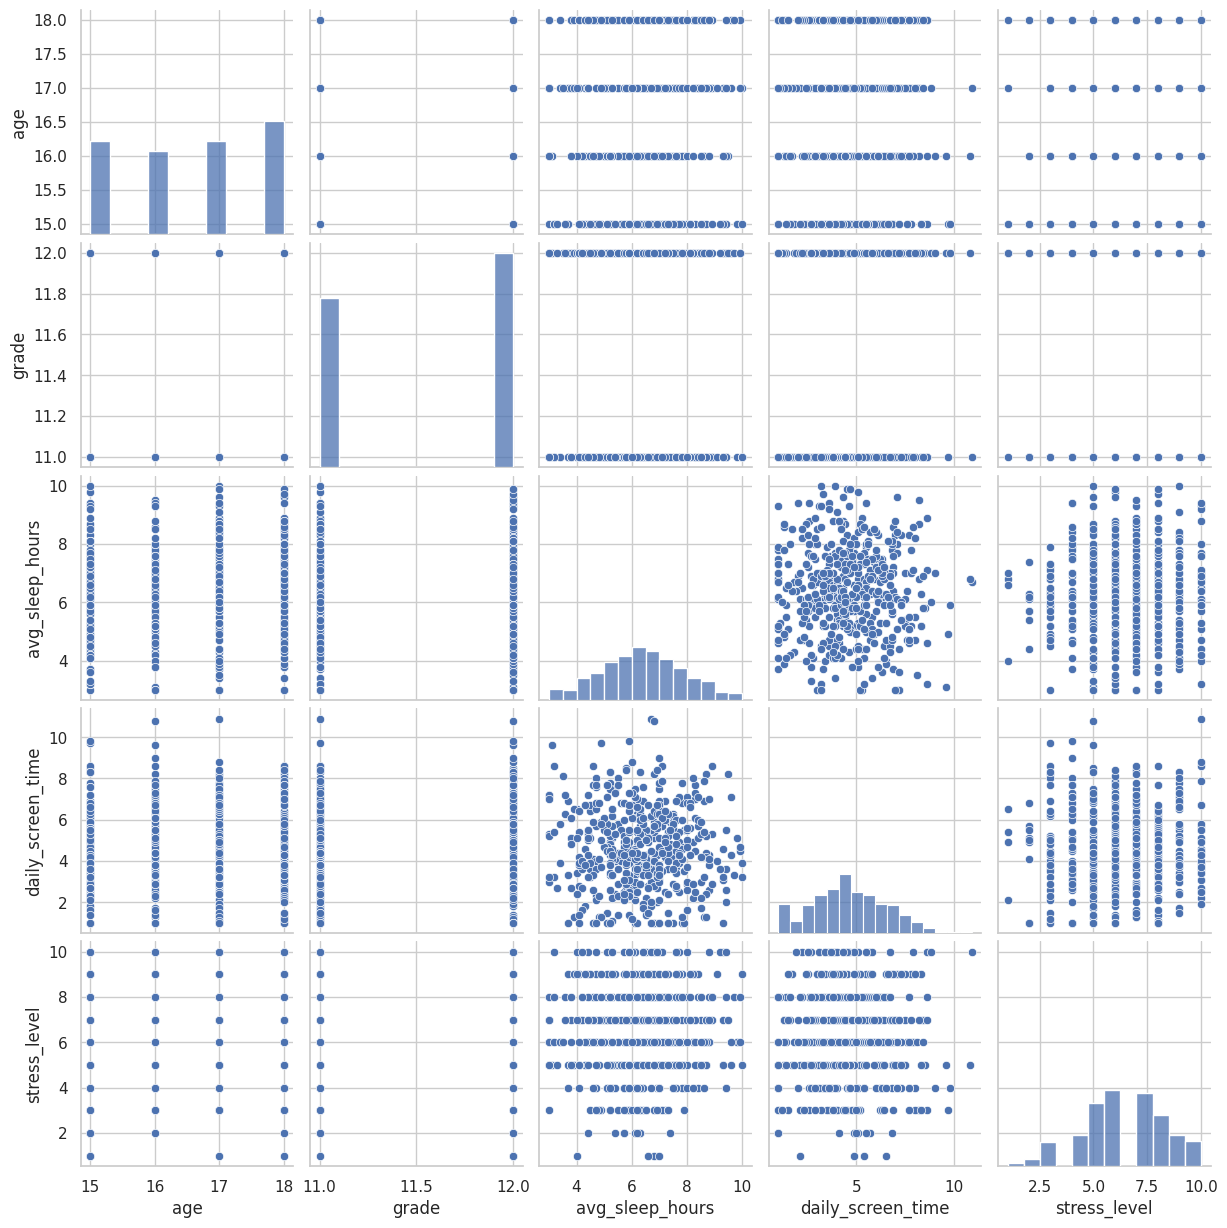

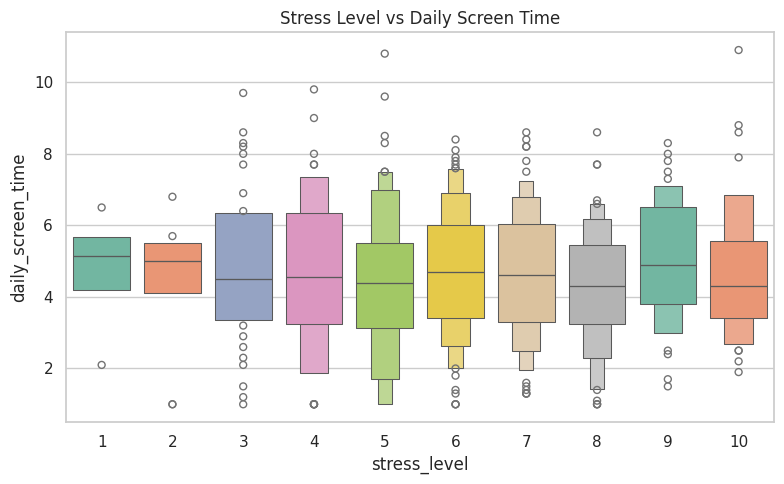

In [ ]:
# Histograms for numeric features of student life dataset
numeric_cols = ['age', 'grade', 'avg_sleep_hours', 'daily_screen_time', 'stress_level']
student_life_df[numeric_cols].hist(figsize=(12,8), bins=15, layout=(2,3))
plt.tight_layout()
plt.show()

# Pair plot to see relationships between numeric variables (if at least 4 numeric columns)
if len(numeric_cols) >= 4:
    sns.pairplot(student_life_df[numeric_cols])
    plt.show()

# Boxen plot for stress level vs daily screen time
plt.figure(figsize=(8,5))
sns.boxenplot(data=student_life_df, x='stress_level', y='daily_screen_time', palette='Set2')
plt.title('Stress Level vs Daily Screen Time')
plt.tight_layout()
plt.show()

## Predictive Modeling on Student Life Data

Dataset ini memprediksi tingkat stres dari faktor perilaku. Untuk ini, saya mengubah tingkat stres berkelanjutan menjadi masalah klasifikasi biner dengan membuat fitur baru, 'high_stress'.

Seorang siswa diberi label memiliki stres tinggi jika tingkat stresnya di atas atau sama dengan 7. Kami kemudian menggunakan fitur-fitur seperti usia, kelas, jam tidur rata-rata, waktu layar harian, dan indikator untuk persiapan ujian dan penggunaan AI untuk belajar guna membangun model regresi logistik. Metrik evaluasi yang kami gunakan adalah akurasi, dilengkapi dengan visualisasi matriks kebingungan.

Pilihan regresi logistik terutama untuk interpretabilitasnya dan sebagai titik awal

Accuracy of the Logistic Regression model: 0.46


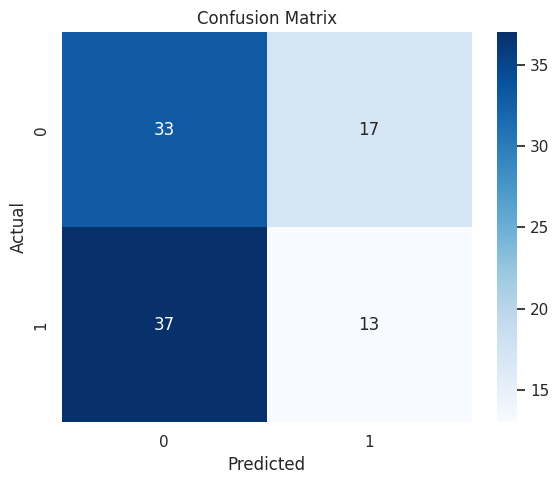

In [ ]:
# Create a binary target variable: high_stress (stress_level >= 7 considered high stress)
student_life_df['high_stress'] = student_life_df['stress_level'].apply(lambda x: 1 if x >= 7 else 0)

# Selecting features for prediction. For categorical variables, we perform one-hot encoding.
features = ['age', 'grade', 'avg_sleep_hours', 'daily_screen_time', 'board_exam_prep', 'uses_AI_for_study']

# One-hot encode the categorical features: board_exam_prep and uses_AI_for_study
data_model = pd.get_dummies(student_life_df[features], drop_first=True)

# Target variable
target = student_life_df['high_stress']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data_model, target, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy of the Logistic Regression model:', acc)

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

## Conclusion and Future Work

In this notebook, we explored several datasets focused on global high school student lifestyle and wellness. We performed data cleaning, exploratory analysis with a range of visualizations, and even built a predictive model to classify high stress levels among students based on their daily behaviors.

The logistic regression model provided a baseline accuracy, and the exploration revealed interesting trends such as the relationship between screen time and stress levels. Future analysis could involve:

- More advanced machine learning models.
- Feature engineering (such as creating additional interaction terms).
- Time series analysis, if data with dates becomes available.

This analysis demonstrates multiple approaches to unlocking insights from educational and wellness data. If you found this notebook useful, please consider upvoting it.